# Scatterplot of lap times across 2025 sessions

This is an exploration of lap times, and tire types, for pre-race sessions (practice and qualification) for the 2025
Monaco Grand Prix.

In [22]:
import seaborn as sns
from matplotlib import pyplot as plt

import fastf1
import fastf1.plotting

# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')

driver = 'NOR'
race = 'Monaco'
season = 2025

In [23]:
# Get FP1 data
fp1 = fastf1.get_session(season, race, 'FP1')
fp1.load()
fp1_laps = fp1.laps.pick_quicklaps().reset_index()

# Get FP2 data
fp2 = fastf1.get_session(season, race, 'FP2')
fp2.load()
fp2_laps = fp2.laps.pick_quicklaps().reset_index()

# Get FP3 data
fp3 = fastf1.get_session(season, race, 'FP3')
fp3.load()
fp3_laps = fp3.laps.pick_quicklaps().reset_index()

# Get quali data
q = fastf1.get_session(season, race, 'Q')
q.load()
q_laps = q.laps.pick_quicklaps().reset_index()

# Get race data
r = fastf1.get_session(season, race, 'R')
r.load()
r_laps = r.laps.reset_index()


core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '5', '6', '10', '12', '14', '16', '18', '22', '23', '27', '30', '31', '43', '44', '55', '63', '81', '87

In [24]:
print(f"FP1: {fp1_laps['LapTime'].min()}   {fp1_laps['LapTime'].max()}")
print(f"FP2: {fp2_laps['LapTime'].min()}   {fp2_laps['LapTime'].max()}")
print(f"FP3: {fp3_laps['LapTime'].min()}   {fp3_laps['LapTime'].max()}")
# print(f"Q:   {q_laps['LapTime'].min()}   {q_laps['LapTime'].max()}")

FP1: 0 days 00:01:11.964000   0 days 00:01:16.958000
FP2: 0 days 00:01:11.355000   0 days 00:01:16.307000
FP3: 0 days 00:01:10.953000   0 days 00:01:15.852000


Slowest lap time of 0 days 00:01:16.958000 is of type <class 'pandas._libs.tslibs.timedeltas.Timedelta'>


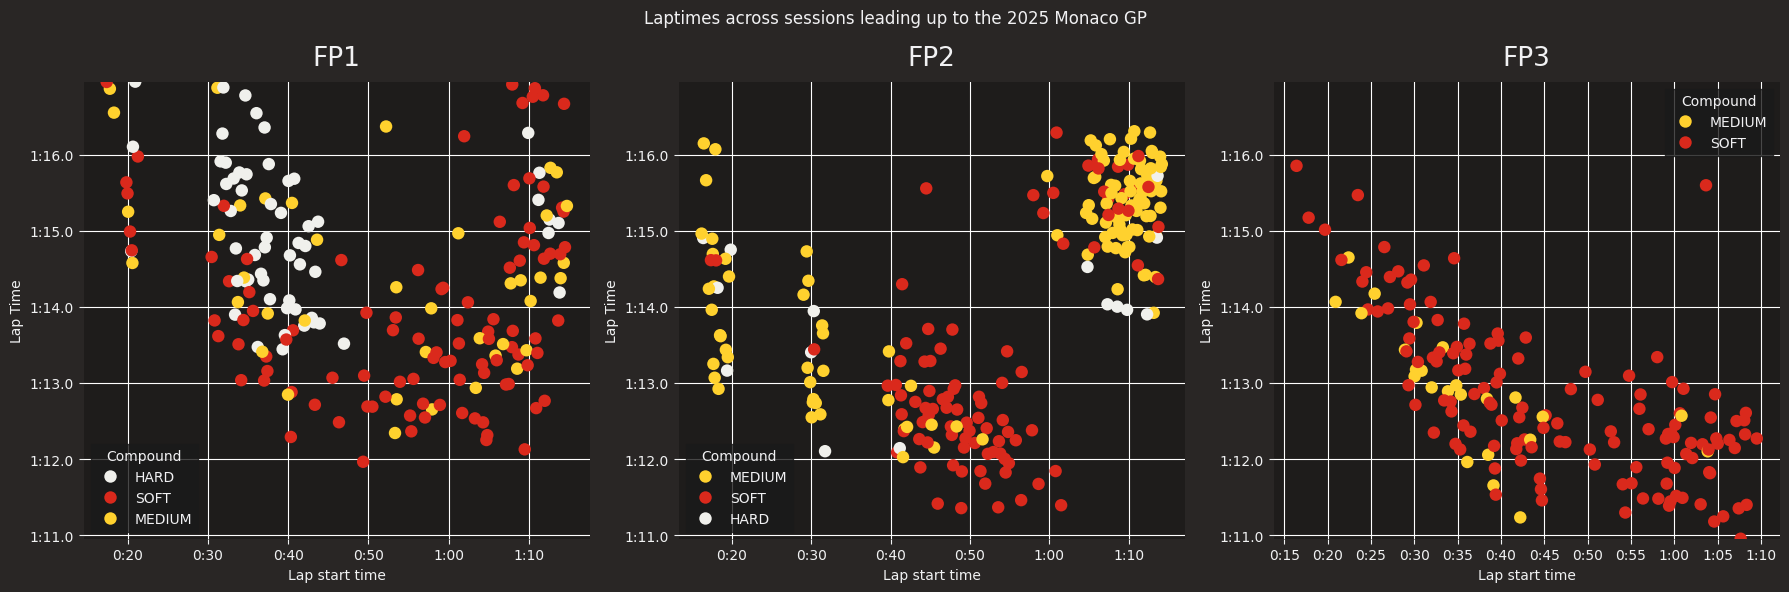

In [25]:
# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(24, 6))
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Lap times in practice and qualification for 2025 Monaco GP')

sns.scatterplot(data=fp1_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp1),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=fp2_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax2,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp2),
                s=80,
                linewidth=0,
                legend='auto'
)

sns.scatterplot(data=fp3_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax3,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=fp3),
                s=80,
                linewidth=0,
                legend='auto'
)

# sns.scatterplot(data=q_laps,
#                 x="LapStartTime",
#                 y="LapTime",
#                 ax=ax3,
#                 hue="Compound",
#                 palette=fastf1.plotting.get_compound_mapping(session=q),
#                 s=80,
#                 linewidth=0,
#                 legend='auto'
# )

# Set common y-axis limits
common_ylim = (fp1_laps['LapTime'].max(), fp3_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
ax2.set_ylim(common_ylim)
ax3.set_ylim(common_ylim)
# ax4.set_ylim(common_ylim)

print(f"Slowest lap time of {fp1_laps['LapTime'].max()} is of type {type(fp1_laps['LapTime'].max())}")

ax1.set_title("FP1")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax2.set_title("FP2")
ax2.set_xlabel("Lap start time")
ax2.set_ylabel("Lap Time")

ax3.set_title("FP3")
ax3.set_xlabel("Lap start time")
ax3.set_ylabel("Lap Time")

# ax4.set_title("Qualification")
# ax4.set_xlabel("Lap start time")
# ax4.set_ylabel("Lap Time")

# The y-axis increases from bottom to top by default
# Since we are plotting time, it makes sense to invert the axis
ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
#ax4.invert_yaxis()

plt.suptitle("Laptimes across sessions leading up to the 2025 Monaco GP")

# Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')
ax2.grid(color='w', which='major', axis='both')
ax3.grid(color='w', which='major', axis='both')
#ax4.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

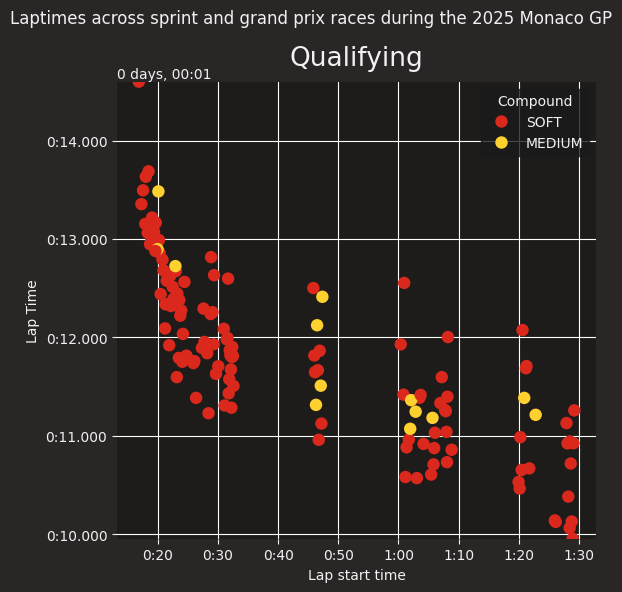

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=q_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=q),
                s=80,
                linewidth=0,
                legend='auto'
)

common_ylim = (q_laps['LapTime'].max(), q_laps['LapTime'].min())
ax1.set_ylim(common_ylim)
# ax2.set_ylim(common_ylim)

ax1.set_title("Qualifying")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax1.invert_yaxis()

# # Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.suptitle("Laptimes across sprint and grand prix races during the 2025 Monaco GP")
plt.tight_layout()
plt.show()


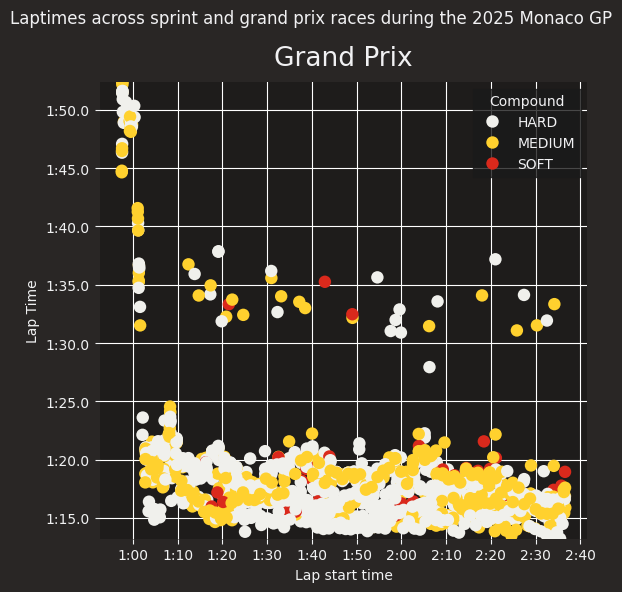

In [27]:
fig, (ax1) = plt.subplots(1, 1, figsize=(6, 6))

sns.scatterplot(data=r_laps,
                x="LapStartTime",
                y="LapTime",
                ax=ax1,
                hue="Compound",
                palette=fastf1.plotting.get_compound_mapping(session=r),
                s=80,
                linewidth=0,
                legend='auto'
)

common_ylim = (r_laps['LapTime'].max(), r_laps['LapTime'].min())
ax1.set_ylim(common_ylim)

ax1.set_title("Grand Prix")
ax1.set_xlabel("Lap start time")
ax1.set_ylabel("Lap Time")

ax1.invert_yaxis()

# # Turn on major grid lines
ax1.grid(color='w', which='major', axis='both')

sns.despine(left=True, bottom=True)

plt.suptitle("Laptimes across sprint and grand prix races during the 2025 Monaco GP")
plt.tight_layout()
plt.show()


---

This is the end of the notebook.